# Micro extraction mechanism model

### Pedro S. Peixoto (ppeixoto@usp.br)

### Example of model usage 


In this example notebook, we will reproduce Figure 2 of Zhang and Pawliszyn (1993)

 - Z. Zhang, J. Pawliszyn, Headspace solid-phase microextraction, *Analytical chemistry* 65 (1993) 1843–1852.

In [1]:
#First import numpy, since all arrays are based on numpy
import numpy as np 

#Import matplotlib, for plotting
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import the main model library
import mextractmodel as mex

All parameters must be adopted in the same units of space/time/mass/volume
here we adopt:
- space units: "cm" 
- time units: "seconds" (s)
- mass: micro-grams (mug)
- volume: cm^3 (mL)


In [3]:
#Experiment basename
name = "HS-MMSE"

Now we need to set the domain, that is, the position of the interfaces.

In [4]:
#Domain definition (position of interfaces) 
# x0   x1   x2
# |----|----|
#x=np.array([initial_position, interface_1, interface_2, final_position])
#x=np.array([0, 1]) # cm
#x=np.array([0, 0.5, 1]) # cm
x=np.array([0, 0.2, 1.0, 1.02])

Now we set the names of the compartments, for ploting purposes

In [5]:
#Names of compartments
#xnames = ["", "", ""]
xnames = ["sample", "HS", "fiber"]

Set initial concentrations, constant in each compartment.

In [6]:
#Initial concentrations in each space
#  Assumed constant for each space
#   C0   C1   C2
# |----|----|----|
#C=np.array([0.0, 1.0]) #mug/mL
C=np.array([1.0, 0.0, 0.0])


Diffusion coefficients for each compartment, constant at each one.

In [7]:
#Diffusion coefficients for each space
#   D0   D1   D2
# |----|----|----|
#D=np.array([2.0, 1.0]) # 2 spaces (cm^2/s)
D=np.array([1.8e-5, 0.077, 2.8e-6])

Set the partition coefficients. Always enforce zero at external boundaries for no flow condition.

In [8]:
#Partition coefficients K for each interface
# Set 0.0 for beggining and endpoints    
# K0  K1  K2   K3
# |---|---|----|
#K=np.array([0.0, 2.0, 0.0]) # 2 boundaries and 1 interface coefficient, non-dimensional
K=np.array([0.0, 5, 0.02, 0.0])

Now configure runtime options

In [9]:
#Max time definition 
#maxtime = 10*60 #10 minutes
maxtime = 14400 #seconds

#Time step size
dt = 1  #Seconds 

#Plotting time spots
iplot_time=np.array([0.0, 600, 1800, 3600, 7200, 14400])
#iplot_time=np.linspace(0, 50, 21, endpoint=True)

#Space discretization (number of grid points)
N = 500

We now build the device with these parameters (we have given the same names of the variables as the device function arguments, but we could have called the variables differently)

In [10]:
p = mex.device(D = D, K = K, C = C, xspace = x, 
        xnames = xnames, name = name, 
        N = N, dt = dt, maxtime = maxtime, iplot_time = iplot_time)


        --------------------------------------------------------------
        Micro Extraction Diffusion Model
        Pedro S. Peixoto - University of Sao Paulo (ppeixoto@usp.br)
        --------------------------------------------------------------
        
You defined a mechanism with 3 compartment(s).
Mechanism layout/interfaces (x):  [0.   0.2  1.   1.02]
Initial concentrations: [1. 0. 0.]
Diffusion coefficients: [1.8e-05 7.7e-02 2.8e-06]
Interface coefficients: [0.   5.   0.02 0.  ]
Output basename: output/HS-MMSE/HS-MMSE

Compartment 0  setup
 Name:                   sample
 Local Domain:           [0.  0.2]
 Difusion (neigbours):   [0.0e+00 1.8e-05 7.7e-02]
 Border/Interfaces Coef: [0. 5.]

Compartment 1  setup
 Name:                   HS
 Local Domain:           [0.2 1. ]
 Difusion (neigbours):   [1.8e-05 7.7e-02 2.8e-06]
 Border/Interfaces Coef: [5.   0.02]

Compartment 2  setup
 Name:                   fiber
 Local Domain:           [1.   1.02]
 Difusion (neigbours):   [7.



Now that the device structure is built, we can actually use in a few ways. 

Lets loop in time the model to see how the concentrations evolve in time. The main function here is run(), which calculates all time steps of an implicit solver for the model of the device. It will save and return snapshots at all time set in iplot_time.

In [11]:
concentrations = p.run()

 It:  0  Time:  0.0  Mass:  0.1999  %Dif Eq:  180.0000 %
 It:  600  Time:  600.0  Mass:  0.2028  %Dif Eq:  98.9306 %
 It:  1800  Time:  1800.0  Mass:  0.2033  %Dif Eq:  15.7871 %
 It:  3600  Time:  3600.0  Mass:  0.2034  %Dif Eq:  1.4948 %
 It:  7200  Time:  7200.0  Mass:  0.2034  %Dif Eq:  0.5966 %
 It:  14400  Time:  14400.0  Mass:  0.2034  %Dif Eq:  0.5869 %
 
 Saving concentrations as 
  output/HS-MMSE/HS-MMSE_data.csv

 %Eq   Time 
50.0 %   1043.00
60.0 %   1188.00
70.0 %   1376.00
80.0 %   1643.00
90.0 %   2107.00
95.0 %   2592.00
99.0 %   4093.00
99.5 %   Not reached



The snapshots were saved in the csv files and also returned to the list of snapshots given at "concentrations". We can use this output to plot the concentrations, as follows. 

The model also calculates the theoretical equilibrium state, which may be accessed via p.u_equi_ext. We can plot them all together.

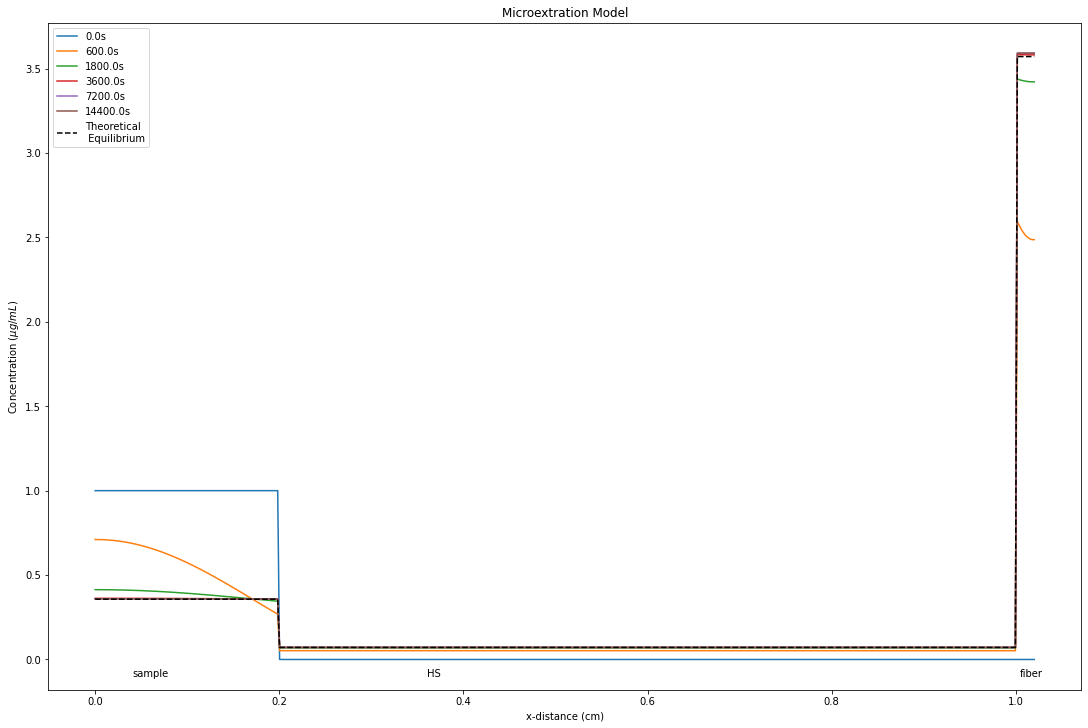

In [12]:
fig, axes = plt.subplots(1, 1, constrained_layout=True, figsize=(15,10))
plt.xlabel("x-distance (cm)")
plt.ylabel("Concentration ($\mu g/mL$)")
plt.title("Microextration Model")

for i, c in enumerate(concentrations):    
    #Plot
    t = iplot_time[i]
    axes.plot(p.x, c, label=str(t)+"s")
    
for i, name in enumerate(xnames):
    x=0.8*p.xspace[i]+0.2*p.xspace[i+1]
    plt.text(x, -0.1, name)
    
axes.plot(p.x, p.u_equi_ext, 'k--', label="Theoretical \n Equilibrium")
axes.legend()
plt.savefig(p.basename+"_final.png")

We can play around with fancier plots, that look more like the device it self

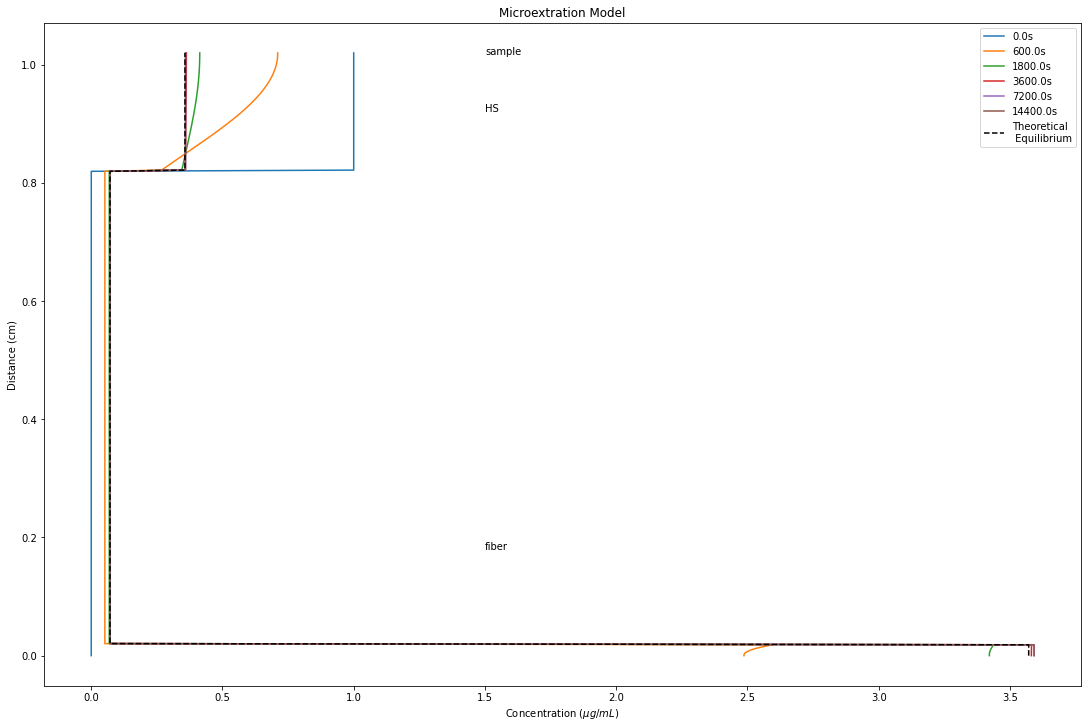

In [13]:
fig, axes = plt.subplots(1, 1, constrained_layout=True, figsize=(15,10))
plt.ylabel("Distance (cm)")
plt.xlabel("Concentration ($\mu g/mL$)")
plt.title("Microextration Model")

for i, c in enumerate(concentrations):    
    #Plot
    t = iplot_time[i]
    axes.plot(np.flip(c, 0), p.x, label=str(t)+"s")
    
for i, name in enumerate(reversed(xnames)):
    x=0.1*p.xspace[i]+0.9*p.xspace[i+1]
    plt.text(1.5, x, name)
    
axes.plot(np.flip(p.u_equi_ext, 0), p.x, 'k--', label="Theoretical \n Equilibrium")
axes.legend()
plt.savefig(p.basename+"_final_vertical.png")